# 🍿Netflix Data Analysis Project
**Author:** Artur Rapacz                                                                                  
**Objective:** Netflix Movies and Series Data Analysis Using Pandas

In [32]:
# Import of libraries needed for analysis and functions used
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")

def absolute_value(values):
    def autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return autopct


In [33]:
# Data loading
df = pd.read_csv('./data/netflix_titles.csv', usecols=['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'duration', 'listed_in'],
                                                index_col='show_id')
df.head()

,type,title,director,country,date_added,release_year,duration,listed_in
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,90 min,Documentaries
s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV"
s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [34]:
#DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   duration      8804 non-null   object
 7   listed_in     8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 619.2+ KB


In [35]:
#Number of missing data in each column
df.isnull().sum()

type               0
title              0
director        2634
country          831
date_added        10
release_year       0
duration           3
listed_in          0
dtype: int64

In [36]:
#Filling in the missing data
df["director"] = df['director'].fillna("Unknown")
df["country"] = df['country'].fillna("Unknown")
df["duration"] = df['duration'].fillna("Unknown")

<Axes: title={'center': 'Movies vs TV Series'}, ylabel='Number'>

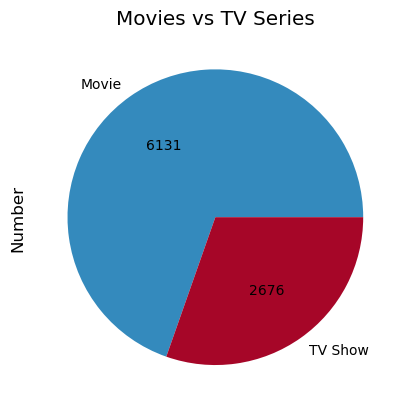

In [37]:
#Number of movies and series on the platform
typeQuantity = df['type'].value_counts()
typeQuantity.plot(kind='pie', title='Movies vs TV Series', rot=0, ylabel='Number', autopct=absolute_value(typeQuantity.values))

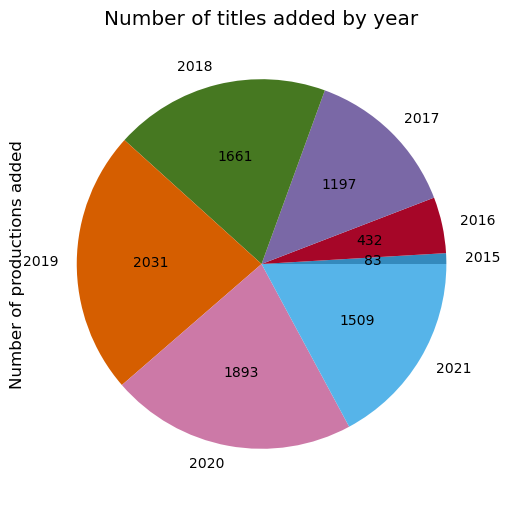

In [65]:
#Number of titles added by year
df['date_added'] = pd.to_datetime(df['date_added'], format="mixed")
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0)
df['year_added'] = df['year_added'].astype(int)
yearQuantity = df['year_added'].value_counts().sort_index()
yearQuantity[8:].plot(kind='pie', title='Number of titles added by year', autopct=absolute_value(yearQuantity.values), 
                      ylabel = 'Number of productions added', figsize=(6,6))
plt.show()


<Axes: title={'center': 'Most common production countries (TOP 10)'}, xlabel='Country', ylabel='Number of productions'>

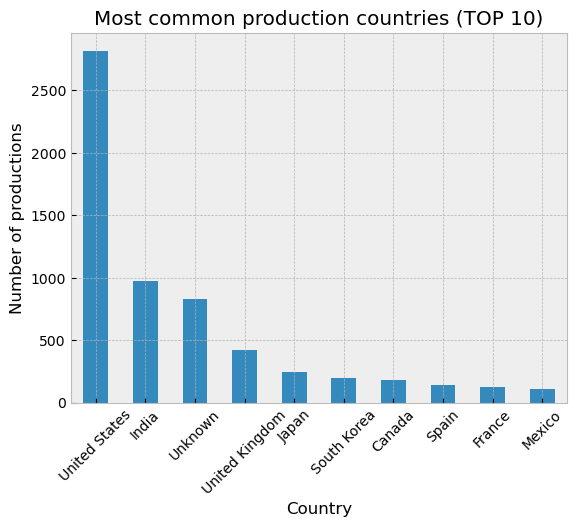

In [39]:
#Most common production countries (TOP 10)
countryQuantity = df['country'].value_counts().head(10)
countryQuantity

countryQuantity.plot(kind='bar', rot=45, title = 'Most common production countries (TOP 10)', ylabel='Number of productions', xlabel='Country')

<Axes: title={'center': 'Number of seasons'}, xlabel='Seasons number', ylabel='Series number'>

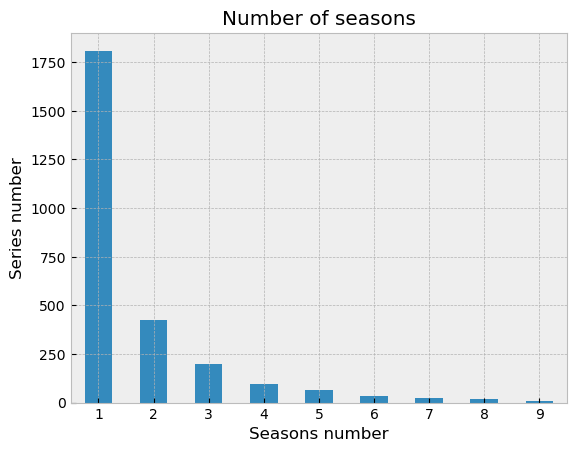

In [63]:
#Number of seasons
TVShowFilter = df['type'] == 'TV Show'
df[TVShowFilter]['duration'].head(20)
seasonQuantity = df[TVShowFilter]['duration'].str[0].value_counts().sort_index()
seasonQuantity.plot(kind='bar', rot=0, ylabel='Series number', xlabel='Seasons number', title='Number of seasons')

<Axes: title={'center': 'Most popular genres (TOP10)'}, xlabel='Genre', ylabel='Number of productions'>

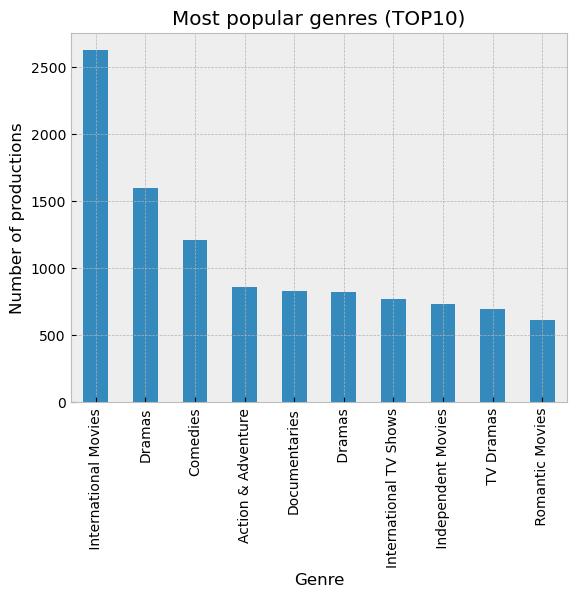

In [61]:
#Most popular genres (TOP10)
movieCategory = df['listed_in'].str.split(',', expand=True).stack().value_counts()
movieCategory[:10].plot(kind='bar', xlabel='Genre', ylabel='Number of productions', title='Most popular genres (TOP10)')

## Conclusions
Based on the above analysis, we can conclude that on the Netflix platform, in terms of number, films dominate over series in a ratio of 70% to 30% in favor of films. The largest number of productions comes from the United States and India, with the United States dominating significantly. The platform adds more and more productions year by year.
From the presented data, we can also read that the vast majority of series end after the first season, with a clear decrease in the number of continued series with each season, where out of approximately 3,000 items, only 17 ended after eight seasons, and 9 after nine seasons.
Among the most popular categories, foreign films, dramas and comedies lead the way.